In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("forestfires.csv")

# Data Pre-Processing

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.shape

(517, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [10]:
df["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [11]:
df["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
#as per data there is less forest fire in nov ,jan and may

In [13]:
df["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

<AxesSubplot:ylabel='None'>

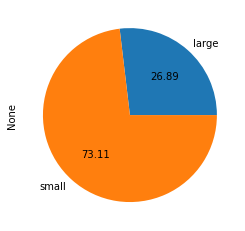

In [14]:
df.groupby('size_category').size().plot(kind='pie', autopct='%.2f')

In [15]:
#Graph shows there is small fire more than large fire
#The Support Vector Machine algorithm is effective for balanced classification
#let's  balanced the dataset

In [16]:
count_small , count_large =  df.size_category.value_counts()

In [17]:
count_large

139

In [18]:
target_count = df.size_category.value_counts()
target_count

small    378
large    139
Name: size_category, dtype: int64

In [19]:
print('Class small:', target_count['small'])
print('Class large:', target_count['large'])
print('Proportion:', round(target_count['large'] /  target_count['small'], 2), ': 1')

Class small: 378
Class large: 139
Proportion: 0.37 : 1


In [20]:
# Divide by class
df_class_small = df[df['size_category'] == 'small']
df_class_large = df[df['size_category'] == 'large']

In [21]:
df_class_small_under = df_class_small.sample(count_large)
df_test_under = pd.concat([df_class_small_under, df_class_large], axis=0)
print('Random under-sampling:')
print(df_test_under.size_category.value_counts())

Random under-sampling:
large    139
small    139
Name: size_category, dtype: int64


In [22]:
df_test_under

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
86,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
418,aug,sun,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
376,aug,mon,92.1,207.0,672.6,8.2,21.1,54,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
248,aug,wed,93.1,157.3,666.7,13.5,28.7,28,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
399,jun,wed,93.3,49.5,297.7,14.0,28.0,34,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,...,0,0,0,0,0,0,0,0,0,large
504,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large


In [23]:
#Now the data is balanced so let's  move forward for Feature Engineering

# Feature Engineering

In [24]:
#Here month and day is categorical column we need to encode it
#but already we have given encoded feature in database so we drop thoe column

In [25]:
df_test_up = df_test_under.drop(["month" , "day"],axis = 1)
df_test_up

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
86,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
418,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0,2.44,0,...,0,0,0,0,0,0,0,0,0,small
376,92.1,207.0,672.6,8.2,21.1,54,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
248,93.1,157.3,666.7,13.5,28.7,28,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
399,93.3,49.5,297.7,14.0,28.0,34,4.5,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,0,...,0,0,0,0,0,0,0,0,0,large
504,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59,0,...,0,0,0,0,0,0,0,0,0,large
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large


In [26]:
#we get our best features

# Data Standardisation

In [27]:
X=df_test_up.iloc[:, :-1]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
86,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
418,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0,2.44,0,...,0,0,0,0,0,0,0,0,0,0
376,92.1,207.0,672.6,8.2,21.1,54,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
248,93.1,157.3,666.7,13.5,28.7,28,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
399,93.3,49.5,297.7,14.0,28.0,34,4.5,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
from sklearn.preprocessing import LabelEncoder
y=df_test_up.iloc[:,-1]
# Encode label category
# small -> 1
# large -> 0
fire_encoder = LabelEncoder()
y = fire_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
X

array([[ 0.46377635,  0.28776229,  0.61071491, ..., -0.06008418,
        -0.14852213,  1.33416641],
       [ 0.26329805,  1.27758757,  0.42999874, ..., -0.06008418,
        -0.14852213, -0.74953169],
       [ 0.28557341,  1.33440533,  0.46493432, ..., -0.06008418,
        -0.14852213, -0.74953169],
       ...,
       [-2.05334015, -0.91288679,  0.43474308, ..., -0.06008418,
        -0.14852213, -0.74953169],
       [-2.05334015, -0.91288679,  0.43474308, ..., -0.06008418,
        -0.14852213, -0.74953169],
       [-2.05334015, -0.91288679,  0.43474308, ..., -0.06008418,
        -0.14852213, -0.74953169]])

# Splitting dataset into training set and testing

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [125]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6142857142857143


In [126]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)  #train on rbf kernal
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6142857142857143


In [127]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)    #train on linear kernal gives ggod accuracy than rbf
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8571428571428571


In [128]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)        #train on poly kernal
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.5714285714285714


# CV on Linear kernel

In [129]:
#Performing K-fold cross validation

In [130]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=6, scoring='accuracy') #cv is cross validation
print(scores)

[0.55319149 0.91489362 0.7173913  0.69565217 0.76086957 0.7173913 ]


In [131]:
print(scores.mean())

0.7265649090348444


In [132]:
#Performing K-fold cross validation on rbf kernal

In [133]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.67857143 0.57142857 0.53571429 0.71428571 0.5        0.46428571
 0.46428571 0.60714286 0.37037037 0.40740741]


In [1]:
print(scores.mean())

NameError: name 'scores' is not defined

In [135]:
#it gives worst accuracy than linear
#So without finding an gamma value move to taking hyperparameter of class

In [136]:
svc=SVC(kernel='linear', C= 1)
svc.fit(X_train,y_train)    #train on linear kernal gives ggod accuracy than rbf
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8571428571428571


In [137]:
#So as we see we come up with linear kernal with c=1 shows best accuracy i.e, 85%